In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {'MSE': mse, 'R2': r2, 'MAE': mae}


In [16]:
data = pd.read_csv('source/repos/ml_univer/2/housing.csv')

In [18]:
data.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


использовала fetch_california_housing, искать нужный датасет было лень

In [2]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [4]:
df = pd.DataFrame(X, columns=housing.feature_names)
df['target'] = y

print("Информация о наборе данных:")
print(df.describe())
print("\nКорреляции с целевой переменной:")
print(df.corr()['target'].sort_values(ascending=False))

Информация о наборе данных:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min 

In [6]:
# Исследование зависимости от количества данных
def study_data_size_impact():
    sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
    results = []
    
    for size in sizes:
        n_samples = int(len(X) * size)
        X_subset = X[:n_samples]
        y_subset = y[:n_samples]
        
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        metrics = evaluate_model(y_test, y_pred)
        metrics['size'] = size
        results.append(metrics)
    
    return pd.DataFrame(results)

# Исследование зависимости от количества признаков
def study_features_impact():
    # Выбираем признаки с наибольшей корреляцией
    correlations = df.corr()['target'].sort_values(ascending=False)
    feature_counts = [2, 4, 6, 8]
    results = []
    
    for n_features in feature_counts:
        selected_features = correlations.index[1:n_features+1]  # +1 потому что первый - это target
        X_selected = df[selected_features].values
        
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        metrics = evaluate_model(y_test, y_pred)
        metrics['n_features'] = n_features
        results.append(metrics)
    
    return pd.DataFrame(results)

In [7]:
print("\nИсследование зависимости от количества данных:")
data_size_results = study_data_size_impact()
print(data_size_results)

print("\nИсследование зависимости от количества признаков:")
features_results = study_features_impact()
print(features_results)


Исследование зависимости от количества данных:
         MSE         R2       MAE  size
0  15.376247 -12.330609  0.537241   0.2
1   0.553757   0.534594  0.525531   0.4
2   0.551191   0.581295  0.540190   0.6
3   0.553795   0.580111  0.542622   0.8
4   0.555892   0.575788  0.533200   1.0

Исследование зависимости от количества признаков:
        MSE        R2       MAE  n_features
0  0.702155  0.464171  0.624683           2
1  0.657452  0.498285  0.602548           4
2  0.655721  0.499606  0.600812           6
3  0.555892  0.575788  0.533200           8


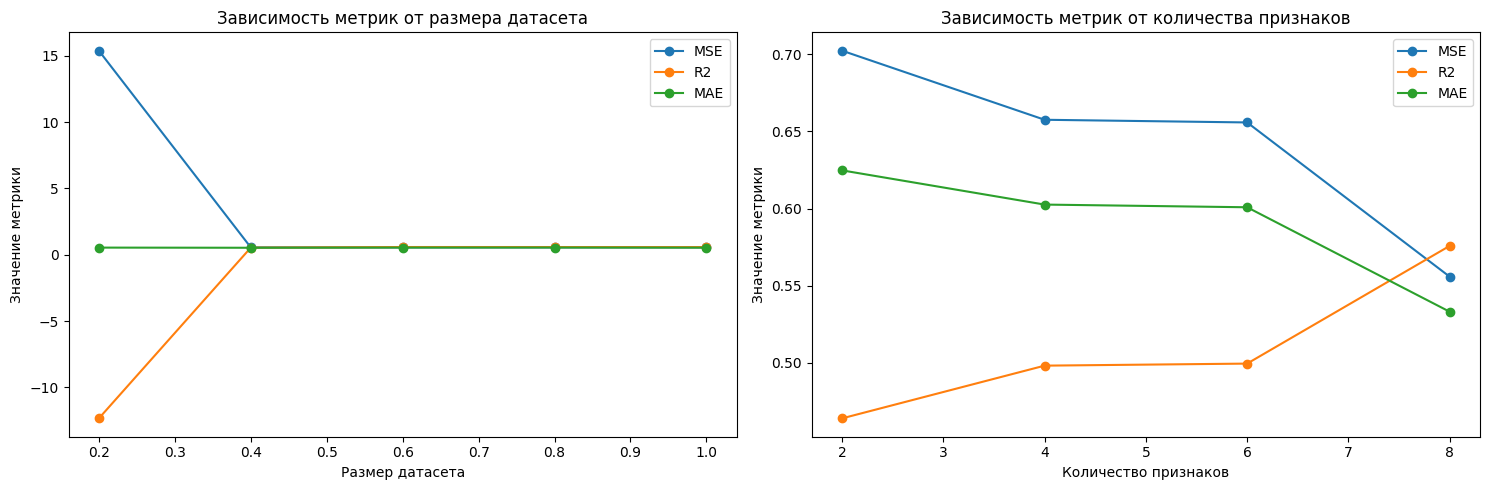

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for metric in ['MSE', 'R2', 'MAE']:
    plt.plot(data_size_results['size'], data_size_results[metric], marker='o', label=metric)
plt.xlabel('Размер датасета')
plt.ylabel('Значение метрики')
plt.title('Зависимость метрик от размера датасета')
plt.legend()

plt.subplot(1, 2, 2)
for metric in ['MSE', 'R2', 'MAE']:
    plt.plot(features_results['n_features'], features_results[metric], marker='o', label=metric)
plt.xlabel('Количество признаков')
plt.ylabel('Значение метрики')
plt.title('Зависимость метрик от количества признаков')
plt.legend()

plt.tight_layout()
plt.show()

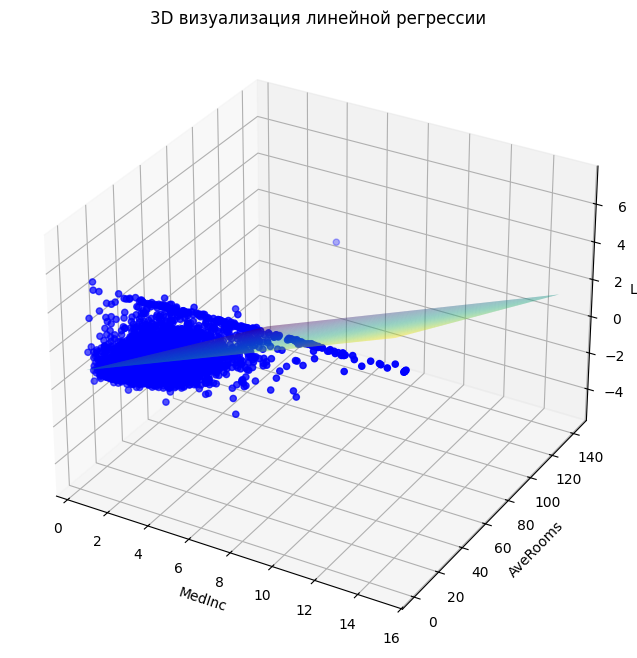

In [9]:
def plot_3d_model():
    top_features = df.corr()['target'].sort_values(ascending=False).index[1:3]
    X_2d = df[top_features].values
    
    X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    x1 = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
    x2 = np.linspace(X_2d[:, 1].min(), X_2d[:, 1].max(), 100)
    X1, X2 = np.meshgrid(x1, x2)
    
    Z = model.coef_[0] * X1 + model.coef_[1] * X2 + model.intercept_
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='blue', marker='o', label='Данные')

    ax.plot_surface(X1, X2, Z, alpha=0.5, cmap='viridis')
    
    ax.set_xlabel(top_features[0])
    ax.set_ylabel(top_features[1])
    ax.set_zlabel('Цена')
    ax.set_title('3D визуализация линейной регрессии')
    plt.show()


plot_3d_model() 